<a href="https://colab.research.google.com/github/subash9025/Machine-Learning-Labs/blob/main/SARF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SENTIMENTAL ANALYSIS USING RANDOM FOREST


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(20)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
test.shape
train.shape

(31962, 3)

In [ ]:
train.value_counts(train["label"])
test.value_counts(train["label"])

label
0    15997
1     1200
dtype: int64

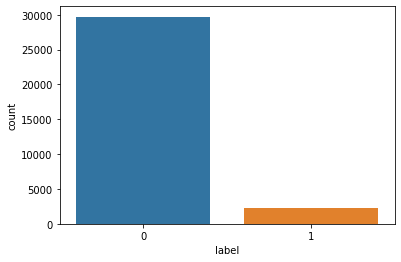

In [ ]:
sns.countplot(x=train["label"])


In [ ]:
train['tweet']=train['tweet'].str.replace('@user','')
train.head()


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train['tweet']=train['tweet'].str.replace('[#,@,$]','')
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide: society now motivation


In [ ]:
train['tweet']=train['tweet'].str.replace('[^a-zA-Z#]',' ')
train.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
5,6,0,huge fan fare and big talking before the...
6,7,0,camping tomorrow danny
7,8,0,the next school year is the year for exams ...
8,9,0,we won love the land allin cavs champion...
9,10,0,welcome here i m it s so gr


In [ ]:
test['tweet']=test['tweet'].str.replace('[^a-zA-Z#]',' ')
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,rd #bihday to my amazing hilarious #nephew...


In [ ]:
test['tweet']=test['tweet'].str.replace('#','')
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacists want everyone to see...
2,31965,safe ways to heal your acne altwaystoheal...
3,31966,is the hp and the cursed child book up for res...
4,31967,rd bihday to my amazing hilarious nephew e...


In [ ]:
test['tweet']=test['tweet'].str.replace('@user','')
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacists want everyone to see...
2,31965,safe ways to heal your acne altwaystoheal...
3,31966,is the hp and the cursed child book up for res...
4,31967,rd bihday to my amazing hilarious nephew e...


In [ ]:
test['tweet']=test['tweet'].str.replace('user','')
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the...
2,31965,safe ways to heal your acne altwaystoheal...
3,31966,is the hp and the cursed child book up for res...
4,31967,rd bihday to my amazing hilarious nephew e...


In [ ]:
from collections import Counter
all_words=[]
for line in list(train['tweet']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

a=Counter(all_words).most_common(10)
a  

[('the', 10236),
 ('to', 9862),
 ('i', 7611),
 ('a', 6538),
 ('you', 5945),
 ('and', 4941),
 ('in', 4704),
 ('for', 4506),
 ('of', 4261),
 ('is', 4194)]

In [ ]:
from collections import Counter
all_wordstest=[]
for line in list(test['tweet']):
  words = line.split()
  for word in words:
    all_wordstest.append(word.lower())

b=Counter(all_wordstest).most_common(10)
b  

[('the', 5513),
 ('to', 5244),
 ('i', 4193),
 ('a', 3449),
 ('you', 3098),
 ('and', 2722),
 ('for', 2500),
 ('in', 2396),
 ('of', 2298),
 ('is', 2286)]

In [ ]:
train['tweet']=train['tweet'].apply(lambda x: x.split())
train.head()

,id,label,tweet
0,1,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,"[bihday, your, majesty]"
3,4,0,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,"[factsguide, society, now, motivation]"


In [ ]:
test['tweet']=test['tweet'].apply(lambda x: x.split())
test.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[white, supremacists, want, everyone, to, see,..."
2,31965,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,"[rd, bihday, to, my, amazing, hilarious, nephe..."


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
train['tweet']=train['tweet'].apply(lambda x:[stemmer.stem(i) for i in x])
train.head()

,id,label,tweet
0,1,0,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,"[bihday, your, majesti]"
3,4,0,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,"[factsguid, societi, now, motiv]"


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
test['tweet']=test['tweet'].apply(lambda x:[stemmer.stem(i) for i in x])
test.head()

,id,tweet
0,31963,"[studiolif, aislif, requir, passion, dedic, wi..."
1,31964,"[white, supremacist, want, everyon, to, see, t..."
2,31965,"[safe, way, to, heal, your, acn, altwaystoh, h..."
3,31966,"[is, the, hp, and, the, curs, child, book, up,..."
4,31967,"[rd, bihday, to, my, amaz, hilari, nephew, eli..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')


In [ ]:
newstopwords=['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newstopwords)

In [ ]:
import string
def process(text):
  nopunc = set(char for char in list(text)if char not in string.punctuation)
  nopunc = " ".join(nopunc)
  return[word for word in nopunc.lower().split()if word.lower() not in stopwords]

In [ ]:
train['tweet']=train['tweet'].apply(process)
train.head()

,id,label,tweet
0,1,0,"[hi, dysfunct, run, selfish, father, drag, kid]"
1,2,0,"[use, van, pdx, thank, caus, credit, offer, wh..."
2,3,0,"[bihday, majesti]"
3,4,0,"[model, love, time, take]"
4,5,0,"[motiv, societi, factsguid]"


In [ ]:
test['tweet']=test['tweet'].apply(process)
test.head()

,id,tweet
0,31963,"[dedic, requir, aislif, willpow, passion, find..."
1,31964,"[supremacist, new, whi, movi, see, white, bird..."
2,31965,"[healthi, altwaystoh, heal, way, safe, acn]"
3,31966,"[hp, alreadi, curs, pottermor, child, reserv, ..."
4,31967,"[nephew, hilari, ahmir, love, miss, dave, eli,..."


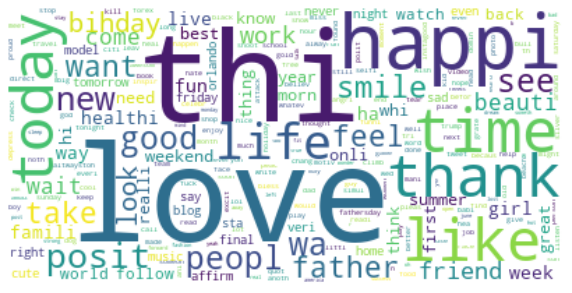

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words=[]
for line in train['tweet']:
  words.extend(line)
wordfreq = Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords
).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

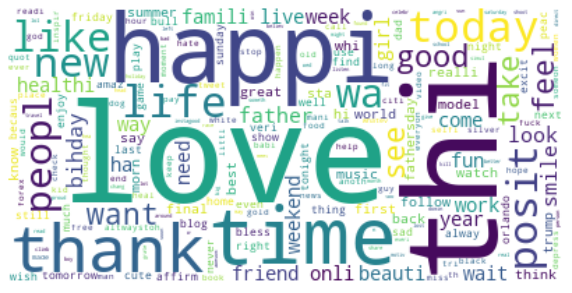

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words=[]
for line in test['tweet']:
  words.extend(line)
wordfreq = Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords
).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def string(text):
  to_return=""
  for i in list(text):
    to_return += str(i)+" "
  to_return = to_return[:-1]
  return to_return

In [ ]:
train['tweet']=train['tweet'].apply(string)
train.head()

,id,label,tweet
0,1,0,hi dysfunct run selfish father drag kid
1,2,0,use van pdx thank caus credit offer wheelchair...
2,3,0,bihday majesti
3,4,0,model love time take
4,5,0,motiv societi factsguid


In [ ]:
test['tweet']=test['tweet'].apply(string)
test.head()

,id,tweet
0,31963,dedic requir aislif willpow passion find studi...
1,31964,supremacist new whi movi see white bird everyo...
2,31965,healthi altwaystoh heal way safe acn
3,31966,hp alreadi curs pottermor child reserv favorit...
4,31967,nephew hilari ahmir love miss dave eli amaz bi...


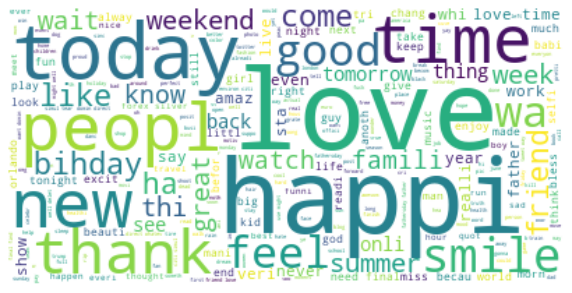

In [ ]:
positive=[r for  r in train['tweet'][train['label']==0]]
pos = ''.join(positive)

wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
  ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

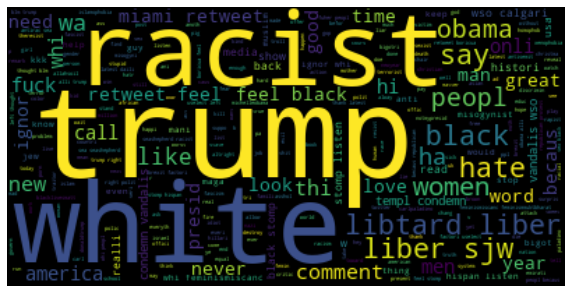

In [ ]:
negative=[r for  r in train['tweet'][train['label']==1]]
neg = ''.join(negative)

wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
  ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()